# Essais en Roue Libre (Free Wheel)

In [3]:
# IMPORT
import matplotlib.pyplot as plt
%run dataframes.ipynb

# Fonction de lissage

In [4]:
def lissage(k,v):
    l = []
    n = 2*k+1
    for i in range(k):
        l.append(np.mean(v[:(i+k)]))
    for i in range(k,len(v)-k):
        l.append(np.mean(v[(i-k):(i+k)]))
    for i in range(len(v)-k,len(v)):
        l.append(np.mean(v[(len(v)-k):]))
    return l

In [5]:
v = count_df['sécurité routière']
l = lissage(1,v)
a = range(len(v))

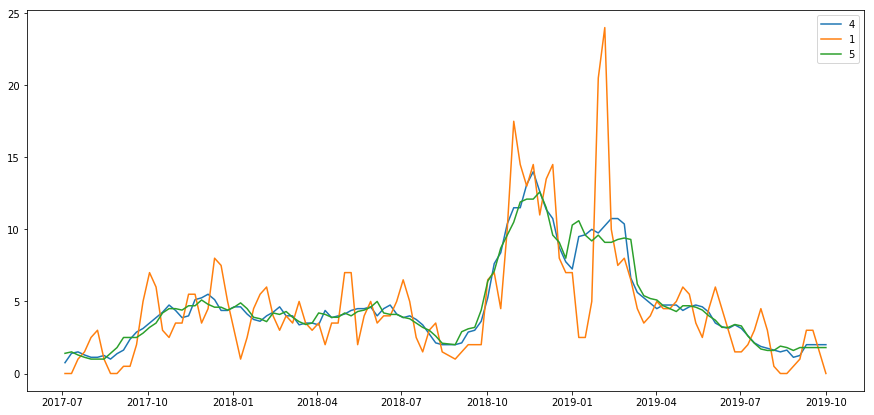

In [6]:
plt.figure(figsize=(15,7))
plt.plot(count_df.index,lissage(4,v),count_df.index,lissage(1,v),count_df.index,lissage(5,v))
plt.legend(['4','1','5',])

In [7]:
serie = count_df['sécurité routière']
hist = []
for nb in range(int(serie.max())):
    hist.append(serie[serie <=nb].size)

In [ ]:
plt.plot(hist)

In [39]:
serie[serie>7]

2017-10-03     8.0
2017-11-14     8.0
2017-12-12    11.0
2018-05-01    12.0
2018-10-02    10.0
2018-10-23    15.0
2018-10-30    20.0
2018-11-06     9.0
2018-11-13    17.0
2018-11-20    12.0
2018-11-27    10.0
2018-12-04    17.0
2018-12-11    12.0
2018-12-25    10.0
2019-01-29    35.0
2019-02-05    13.0
2019-02-19     8.0
2019-02-26     8.0
Name: sécurité routière, dtype: float64

In [2]:
# On regroupe par concaténation de k semaines
p=len(count_df)
k = 5
group_week = sum([[count_df.index[i*k] for j in range(k)] for i in range(p//k)],[count_df.index[0] for i in range(p%k)])
count_themes = count_df[themes[:5]]
count_themes['group_week'] = group_week

count_stack = count_themes.groupby('group_week').agg('sum').apply(lambda x: x/sum(x),axis=1)

fig, ax = plt.subplots(figsize=(12,7))
ax.stackplot(count_stack.index,count_stack.T,labels = count_stack.columns)
ax.legend(loc='upper left')
plt.show()

NameError: name 'count_df' is not defined